In [1]:
# covid_time_series_analysis.ipynb

# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (14, 6)

# 2. Load Dataset from Johns Hopkins GitHub (Download or clone the repo beforehand)
CONFIRMED_PATH = "D:/data_analyst/AnalyticsProjects/projects/Covid-19 Time Series Analysis/time_series_covid19_confirmed_global.csv"
DEATHS_PATH = "D:/data_analyst/AnalyticsProjects/projects/Covid-19 Time Series Analysis/time_series_covid19_deaths_global.csv"

confirmed_df = pd.read_csv(CONFIRMED_PATH)
deaths_df = pd.read_csv(DEATHS_PATH)

# 3. Preview Data
confirmed_df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [3]:
# 4. Preprocess and Transform
def transform_time_series(df):
    date_cols = df.columns[4:]  # Skip non-date metadata columns
    df = df.groupby('Country/Region')[date_cols].sum()
    df = df.T
    df.index = pd.to_datetime(df.index, format="%m/%d/%y")  # Explicit date format
    return df

confirmed_ts = transform_time_series(confirmed_df)
deaths_ts = transform_time_series(deaths_df)

confirmed_ts.head()



Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0


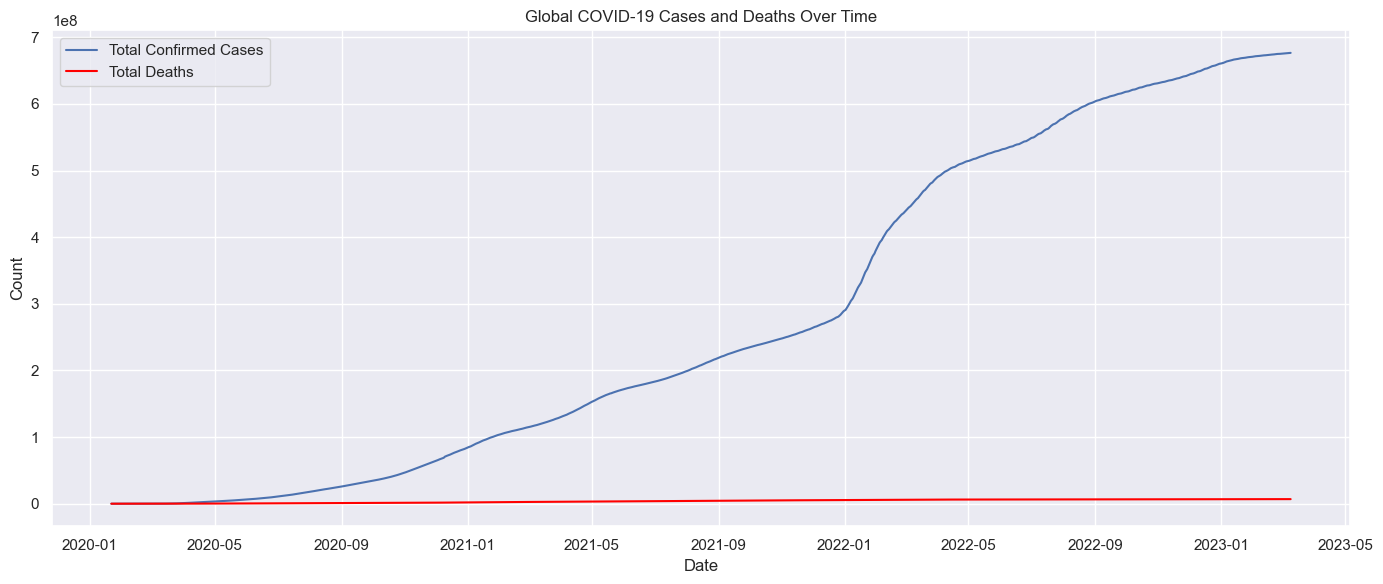

In [4]:
# 5. Global Time Series Analysis

global_cases = confirmed_ts.sum(axis=1)
global_deaths = deaths_ts.sum(axis=1)

# Total Cases Over Time
plt.plot(global_cases, label='Total Confirmed Cases')
plt.plot(global_deaths, label='Total Deaths', color='red')
plt.title("Global COVID-19 Cases and Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

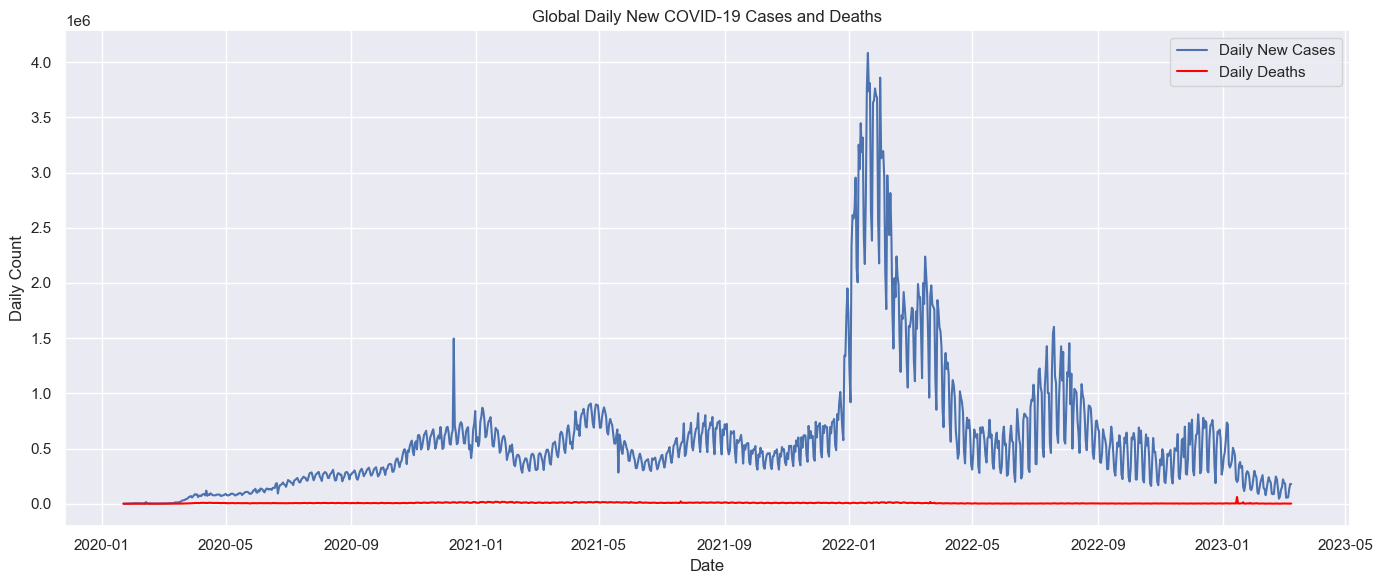

In [5]:
# 6. Daily New Cases - Global
daily_new_cases = global_cases.diff().fillna(0)
daily_new_deaths = global_deaths.diff().fillna(0)

plt.plot(daily_new_cases, label='Daily New Cases')
plt.plot(daily_new_deaths, label='Daily Deaths', color='red')
plt.title("Global Daily New COVID-19 Cases and Deaths")
plt.xlabel("Date")
plt.ylabel("Daily Count")
plt.legend()
plt.tight_layout()
plt.show()


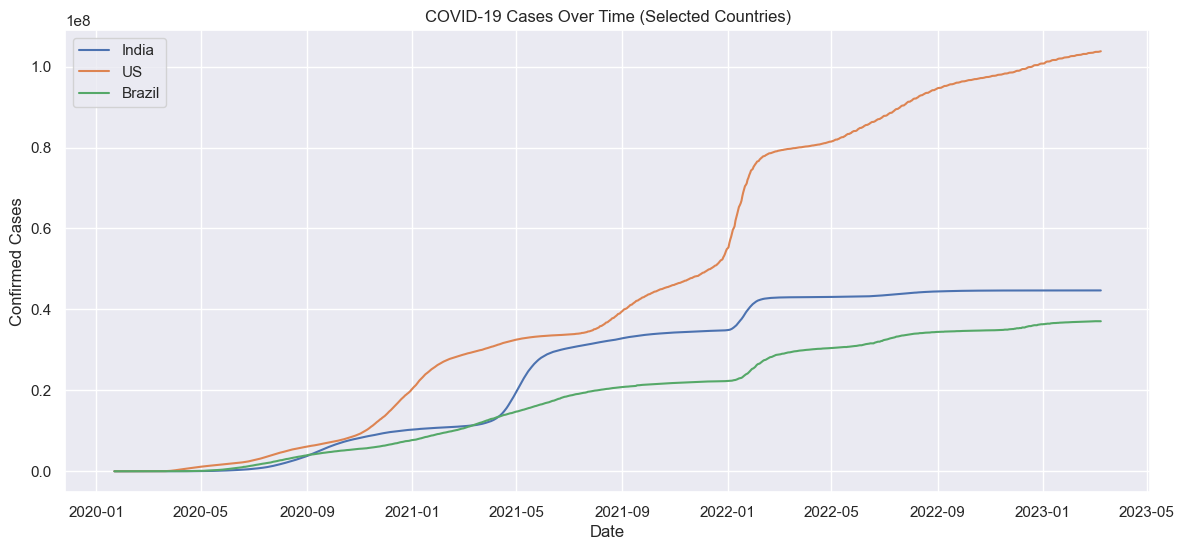

In [6]:
# 7. Country-Specific Analysis: e.g., India, US
countries = ['India', 'US', 'Brazil']

for country in countries:
    plt.plot(confirmed_ts[country], label=f"{country}")

plt.title("COVID-19 Cases Over Time (Selected Countries)")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()


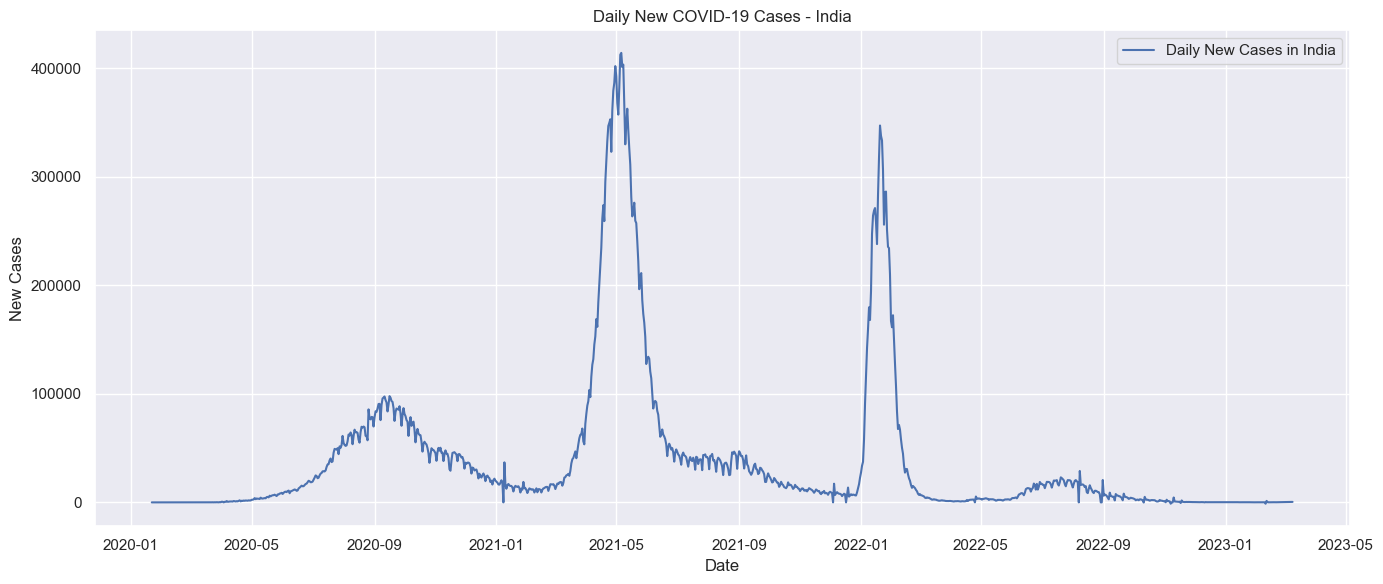

In [7]:
# 8. Daily New Cases for a Specific Country
country = 'India'
daily_new = confirmed_ts[country].diff().fillna(0)

plt.plot(daily_new, label=f'Daily New Cases in {country}')
plt.title(f"Daily New COVID-19 Cases - {country}")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
# 9. Summary Insights

print(f"Latest Global Confirmed Cases: {int(global_cases.iloc[-1]):,}")
print(f"Latest Global Deaths: {int(global_deaths.iloc[-1]):,}")

# Top 5 affected countries
latest_data = confirmed_ts.iloc[-1].sort_values(ascending=False).head(5)
print("\nTop 5 countries with confirmed cases:")
print(latest_data)

# Death Rate Estimate
death_rate = (global_deaths.iloc[-1] / global_cases.iloc[-1]) * 100
print(f"\nEstimated Global Death Rate: {death_rate:.2f}%")


Latest Global Confirmed Cases: 676,570,149
Latest Global Deaths: 6,881,802

Top 5 countries with confirmed cases:
Country/Region
US         103802702
India       44690738
France      39866718
Germany     38249060
Brazil      37076053
Name: 2023-03-09 00:00:00, dtype: int64

Estimated Global Death Rate: 1.02%
